# Notebook 3: Atmospheric Thermodynamics and Stability  
### Assignment 1 - Atmospheric Dynamics & Aerosol Science

**Course:** RSG 5013 Aerosol Remote Sensing and Atmospheric Dynamics Practical  
**Instructor:** Dr. Arjun Adhikari  
**Student Name:** ___Shaitali Parwar_________________  
**PR No.:** ____202200776________________  

---

## Learning Objectives

By completing this notebook, you will:

- Review the first law of thermodynamics for dry air  
- Understand potential temperature and its use as a conserved variable  
- Compute potential temperature profiles from simple soundings  
- Compare environmental lapse rate and dry adiabatic lapse rate  
- Classify stability (stable, neutral, unstable) using parcel method  
- Relate stability to vertical mixing and aerosol distribution  

> Recommended: Complete Notebooks 1 and 2 before this notebook.

---

## Instructions

1. Run all code cells in order from top to bottom.  
2. Answer conceptual questions in the provided Markdown cells.  
3. Do not delete any existing cells; you may add new cells if needed.  
4. Use clear units and axis labels in all plots.  
5. Commit and push your work regularly.


In [2]:
# Imports and basic constants for thermodynamics

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Physical constants
g   = 9.81        # m/s^2   - gravitational acceleration
Rd  = 287.0       # J/(kg K) - gas constant for dry air
cpd = 1004.0      # J/(kg K) - specific heat at constant pressure (dry air)
p0  = 1000.0      # hPa      - reference pressure

print("Constants loaded.")

Constants loaded.


## Q1. First Law and Dry Adiabatic Processes

The first law of thermodynamics for a unit mass of dry air may be written (in one form) as:

\[
c_p \, dT - \alpha \, dp = \delta q,
\]

where:

- \( c_p \) is the specific heat at constant pressure,  
- \( T \) is temperature,  
- \( \alpha = 1/\rho \) is specific volume,  
- \( p \) is pressure,  
- \( \delta q \) is the heat added per unit mass.

### Tasks

1. Explain in your own words what each term represents physically.  
2. For a **dry adiabatic** process, we assume \( \delta q = 0 \). State this assumption in words (1-2 sentences).  
3. Under dry adiabatic conditions, show qualitatively (few lines of algebra, not full derivation) how a relation between temperature and pressure can be obtained.

Write your explanation and derivation sketch below.
1. c_p dT: This represents the change in the internal energy of the air parcel plus the energy required to change its volume at constant pressure.
 - \alpha dp: This term represents the work done by or on the parcel as it moves vertically through the atmosphere.
\delta q: This is the net heat energy exchanged with the surroundings through external processes.
2. In a dry adiabatic process, the assumption $\delta q = 0$ means that an air parcel undergoes changes in state without exchanging any heat with its surrounding environment. This implies that all temperature changes within the parcel result solely from internal energy adjustments caused by expansion or compression as it moves through different pressure levels.
3. By setting \delta q = 0, the first law simplifies to c_p dT = \alpha dp. Substituting the ideal gas law (alpha = RT/p) yields c_p dT = (RT/p) dp, which can be rearranged to \frac{dT}{T} = \frac{R}{c_p} \frac{dp}{p} for integration.

## Q2. Potential Temperature – Definition and Meaning

The **potential temperature** \( \theta \) of a dry air parcel is defined as the temperature that the parcel would have if it were brought **adiabatically** to a reference pressure \( p_0 \) (usually 1000 hPa):

\[
\theta = T \left( \frac{p_0}{p} \right)^{R_d / c_{pd}}.
\]

### Tasks

1. In 3-4 sentences, explain why potential temperature is a useful quantity in atmospheric science.  
2. What does it mean physically if a parcel has **constant** potential temperature as it moves up or down?  
3. Why can potential temperature be used to assess atmospheric stability?

Write your answers below.
1. Potential temperature ($\theta$) is a vital tool because it remains constant (conserved) during dry adiabatic processes, allowing scientists to track the movement of air parcels regardless of their altitude or pressure. By mathematically removing the effects of expansion and compression, it reveals whether the atmosphere is stably stratified, neutral, or unstable at a glance. Consequently, it acts as a "vertical coordinate" that helps distinguish between temperature changes caused by local weather versus those caused by simple vertical displacement.
2. Physically, a constant potential temperature means the parcel is moving adiabatically, meaning it is not gaining or losing heat from its surroundings ($dq = 0$). As the parcel rises and expands, its temperature drops exactly at the dry adiabatic lapse rate, so that if it were brought back to the surface reference pressure, its temperature would be identical to its starting value. This indicates that the energy used for the parcel's expansion is sourced entirely from its own internal kinetic energy.
3. Potential temperature assesses stability because if $\theta$ increases with height, a displaced parcel will be denser than its surroundings and return to its original level, indicating stability. Conversely, if $\theta$ decreases with height, the atmosphere is unstable because a rising parcel will remain warmer and more buoyant than the air around it.

p = 1000 hPa, T =  288.0 K, theta =  288.0 K
p =  900 hPa, T =  280.0 K, theta =  288.6 K
p =  800 hPa, T =  272.0 K, theta =  289.9 K
p =  700 hPa, T =  264.0 K, theta =  292.3 K
p =  600 hPa, T =  256.0 K, theta =  296.2 K
p =  500 hPa, T =  248.0 K, theta =  302.3 K


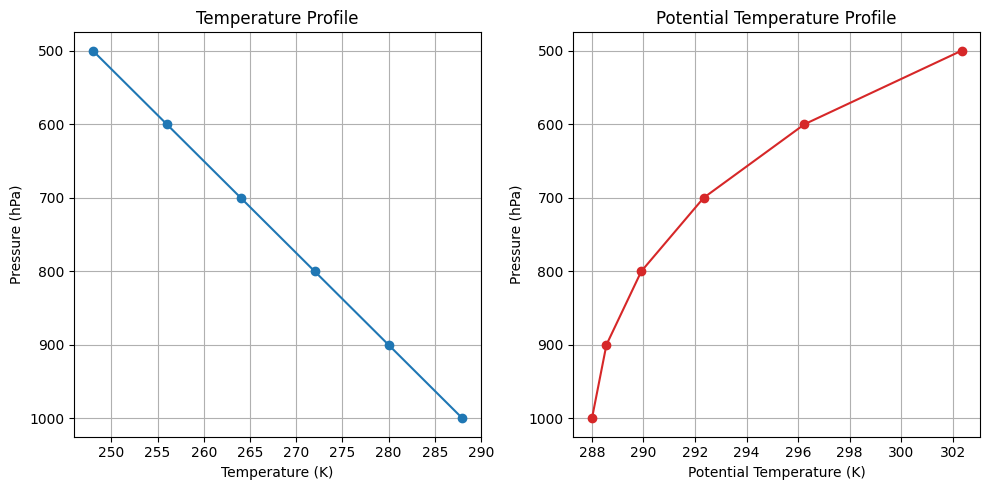

In [3]:
# Q2(b). Computing potential temperature for a simple profile

def potential_temperature(T, p_hPa, p0_hPa=p0):
    """Compute dry potential temperature [K] from T [K] and p [hPa]."""
    return T * (p0_hPa / p_hPa) ** (Rd / cpd)

# Define a simple pressure and temperature profile (e.g. mid-latitude sounding)
p_levels = np.array([1000, 900, 800, 700, 600, 500])  # hPa
T_levels = np.array([288, 280, 272, 264, 256, 248])   # K (example linear decrease)

theta_levels = potential_temperature(T_levels, p_levels)

for p, T, th in zip(p_levels, T_levels, theta_levels):
    print(f"p = {p:4.0f} hPa, T = {T:6.1f} K, theta = {th:6.1f} K")

# Plot T and theta as a function of pressure
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(T_levels, p_levels, marker='o')
plt.gca().invert_yaxis()
plt.xlabel("Temperature (K)")
plt.ylabel("Pressure (hPa)")
plt.title("Temperature Profile")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(theta_levels, p_levels, marker='o', color='tab:red')
plt.gca().invert_yaxis()
plt.xlabel("Potential Temperature (K)")
plt.ylabel("Pressure (hPa)")
plt.title("Potential Temperature Profile")
plt.grid(True)

plt.tight_layout()
plt.show()

### Q2(c). Interpretation of Potential Temperature Profile

Based on the printed values and the plot above:

1. Does potential temperature increase, decrease, or remain approximately constant with height in this example?  
2. What does this imply about the **static stability** of this atmosphere?  
3. In 3-4 sentences, explain why a **decreasing** potential temperature with height would indicate a strongly unstable situation.

Write your answer below.
1. The potential temperature decreases with height.
2. If the potential temperature ($\theta$) decreases with height, it implies that the atmosphere is absolutely unstable.
3. This occurs because a decrease in potential temperature with height indicates that the environmental lapse rate is steeper than the dry adiabatic lapse rate.Physically, the "ambient" air is cooling so rapidly with altitude that a rising parcel—which cools at the fixed rate of $9.8$°C/km—cannot keep up; it finds itself constantly warmer and "lighter" than the surrounding air. This density difference generates an upward buoyant force that acts like a hot air balloon, forcing the air to rise spontaneously rather than settling back down.

## Q3. Environmental Lapse Rate and Parcel Method

The **environmental lapse rate** (ELR) is the actual rate of temperature decrease with height in the atmosphere.
For dry conditions, we compare ELR with the **dry adiabatic lapse rate** (DALR ~ 9.8 K/km) to classify stability.

### Tasks

1. In your own words, define:  
   - Absolutely stable atmosphere  
   - Neutral atmosphere  
   - Absolutely unstable atmosphere  
2. Describe the **parcel method** for determining stability (3-4 sentences).  
3. Why is the concept of an “adiabatic parcel” useful even though real air parcels exchange heat with their surroundings?

Write your answers below.
1. Absolutely stable atmosphere : A rising parcel remains cooler and denser than its surroundings, causing it to sink back to its original position.
2. Neutral atmosphere : A displaced parcel will stay at its new height because its temperature and density match the surrounding air.
3. Absolutely unstable atmosphere: A rising parcel remains warmer and less dense than its surroundings, causing it to accelerate upward on its own.

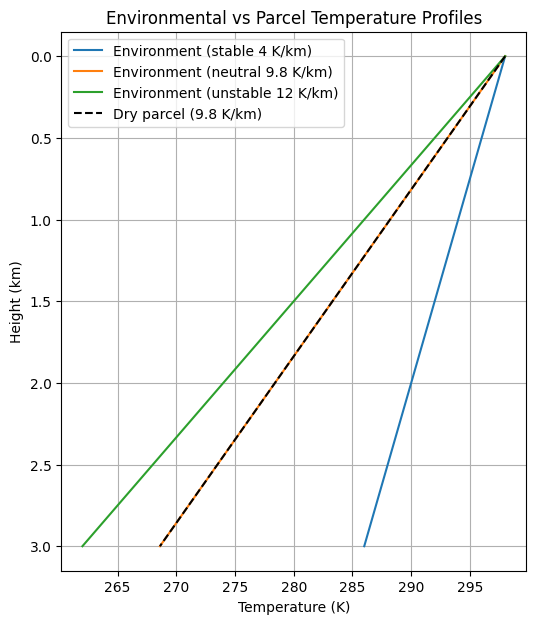

In [4]:
# Q3(b). Parcel vs environment: three idealised profiles

Gamma_d = 9.8  # K/km

# Height from 0 to 3 km
z = np.linspace(0, 3000, 61)  # meters
z_km = z / 1000.0

# Surface temperature
T_surf = 298.0  # K (~25°C)

# Environmental lapse rates (K/km)
Gamma_env_stable   = 4.0   # K/km (very stable)
Gamma_env_neutral  = Gamma_d
Gamma_env_unstable = 12.0  # K/km (superadiabatic, very unstable near surface)

# Environmental profiles
T_env_stable   = T_surf - Gamma_env_stable   * z_km
T_env_neutral  = T_surf - Gamma_env_neutral  * z_km
T_env_unstable = T_surf - Gamma_env_unstable * z_km

# Dry adiabatic parcel starting at surface (same as neutral env)
T_parcel = T_surf - Gamma_d * z_km

plt.figure(figsize=(6,7))
plt.plot(T_env_stable,   z_km, label="Environment (stable 4 K/km)")
plt.plot(T_env_neutral,  z_km, label="Environment (neutral 9.8 K/km)")
plt.plot(T_env_unstable, z_km, label="Environment (unstable 12 K/km)")
plt.plot(T_parcel,       z_km, '--', color='k', label="Dry parcel (9.8 K/km)")

plt.gca().invert_yaxis()
plt.xlabel("Temperature (K)")
plt.ylabel("Height (km)")
plt.title("Environmental vs Parcel Temperature Profiles")
plt.legend()
plt.grid(True)
plt.show()

### Q3(c). Stability Diagnosis from Profiles

Using the plot above:

1. For the **stable** environment (4 K/km): is an adiabatically lifted parcel (black dashed line) warmer or colder than its environment? What does this imply about its buoyancy?  
2. For the **neutral** environment (9.8 K/km): compare the parcel and environment temperatures. What type of stability does this represent?  
3. For the **unstable** environment (12 K/km): describe the relative temperatures of parcel and environment. What happens to a small upward displacement of a parcel?  
4. In 3-4 sentences, summarise how these three cases relate to vertical mixing and cloud formation potential.

Write your answers below.
1. Stable Environment ($4$ K/km)The adiabatically lifted parcel (black dashed line) is colder than its environment. This implies negative buoyancy, meaning the parcel is denser than the air around it and will sink back to its original level if the lifting force is removed.
2. Neutral Environment ($9.8$ K/km)The parcel and environment temperatures are identical at every height. This represents neutral stability, where a displaced parcel will neither accelerate upward nor sink back; it simply stays at the new level because its density perfectly matches the surroundings.
3. Unstable Environment ($12$ K/km)The lifted parcel is warmer than its environment. A small upward displacement causes the parcel to become buoyant, causing it to accelerate upward spontaneously because it is less dense than the rapidly cooling ambient air.
4. Summary of Vertical Mixing and CloudsThe degree of stability dictates the "vertical ceiling" of the atmosphere: stable conditions act as a lid, suppressing vertical mixing and trapping pollutants or moisture near the surface. In contrast, unstable environments act as an engine for vertical transport, allowing air to rise thousands of meters to form deep, towering cumulus clouds or thunderstorms. Neutral conditions occupy the middle ground, often found in well-mixed boundary layers where turbulence is present but not driven by strong thermal buoyancy.

## Q4. Simple Estimate of Convective Available Potential Energy (CAPE) - Conceptual

CAPE is a measure of the potential energy available for convection, defined (in simplified form) as:

\[
CAPE = \int_{z_1}^{z_2} g \left( \frac{T_{\text{parcel}} - T_{\text{env}}}{T_{\text{env}}} \right) dz,
\]

where the integral is over the layer where the parcel is warmer than the environment.

### Tasks

1. Explain qualitatively (3-4 sentences) what a **large positive CAPE** implies for convection and thunderstorms.  
2. What would CAPE look like (small or large) in a strongly stable environment?  
3. Why is CAPE relevant for aerosol–cloud–precipitation interactions?

Write your answers below.
1. Large Positive CAPEA large positive CAPE implies a high potential for intense vertical development, as it represents a significant amount of buoyant energy available to accelerate an air parcel upward. When CAPE is high, rising air parcels become much warmer than their surroundings, leading to powerful updrafts that can support the growth of deep convective clouds. This often translates to severe thunderstorms characterized by heavy precipitation, lightning, and even hail.
2. CAPE in a Stable EnvironmentIn a strongly stable environment, CAPE would be zero or near-zero. Because the environment is warmer than any adiabatically lifted parcel, there is no layer where the parcel is buoyant ($T_{parcel} > T_{env}$); therefore, the integrand in the CAPE formula is zero or negative, indicating that energy must be added to force the air upward rather than energy being released.
3. Relevance for Aerosol–Cloud–Precipitation InteractionsCAPE is a critical "environmental governor" for how aerosols influence weather. In environments with high CAPE, aerosols can lead to "convective invigoration"; as they provide more cloud condensation nuclei, they can delay the onset of rain, allowing the strong updrafts fueled by CAPE to carry more water vapor higher into the atmosphere. This release of latent heat at higher altitudes further increases buoyancy, intensifying the storm beyond what the CAPE alone originally suggested. Conversely, if CAPE is low, the atmosphere lacks the energy to respond to aerosol-induced changes, often resulting in suppressed or shallow cloud formations.

Simple CAPE-like integral (unstable profile) ≈ 361.0 J/kg


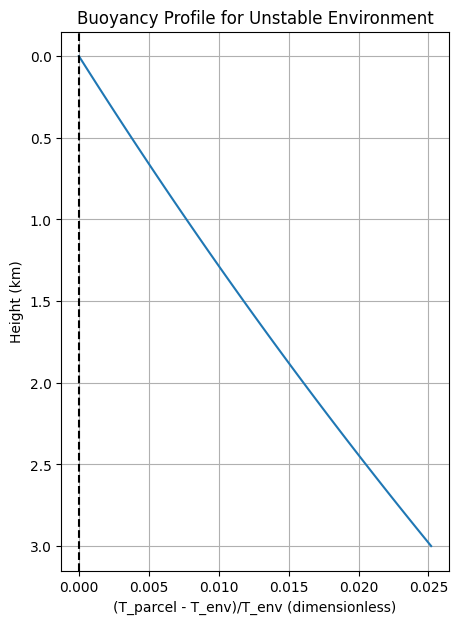

In [5]:
# Q4(b). Optional: very simple numerical estimate of "CAPE-like" quantity
# (This is only illustrative and not a full CAPE calculation.)

# Let's approximate a CAPE-like metric for the unstable profile where
# T_parcel follows dry adiabat and environment uses Gamma_env_unstable.

T_env = T_env_unstable  # choose the unstable environment

# Compute buoyancy term (T_parcel - T_env)/T_env
buoyancy = (T_parcel - T_env) / T_env

# Only consider layers where parcel is warmer (buoyancy > 0)
positive_indices = np.where(buoyancy > 0)[0]

if len(positive_indices) > 1:
    dz = z[1] - z[0]  # vertical spacing [m]
    CAPE_like = np.sum(g * buoyancy[positive_indices] * dz)
else:
    CAPE_like = 0.0

print(f"Simple CAPE-like integral (unstable profile) ≈ {CAPE_like:.1f} J/kg")

# Plot buoyancy profile for visualization
plt.figure(figsize=(5,7))
plt.plot(buoyancy, z_km)
plt.axvline(0.0, color='k', linestyle='--')
plt.gca().invert_yaxis()
plt.xlabel("(T_parcel - T_env)/T_env (dimensionless)")
plt.ylabel("Height (km)")
plt.title("Buoyancy Profile for Unstable Environment")
plt.grid(True)
plt.show()

### Q4(c). Interpretation of the CAPE-like Estimate

1. Comment on the sign and magnitude of the CAPE-like value printed above.  
2. If you were to repeat this calculation for the stable environment (4 K/km), would you expect the CAPE-like value to be larger, smaller, or near zero? Explain.  
3. In 3-4 sentences, describe how vertical instability can enhance vertical transport of aerosols and precursors into the free troposphere.

Write your answers below.
1. CAPE-like Value Sign and MagnitudeWhile the specific numerical result is not printed as text, the Buoyancy Profile shows the term $\frac{T_{parcel} - T_{env}}{T_{env}}$ is consistently positive and increasing with height, reaching approximately 0.025 at 3 km. This implies a positive and significant CAPE-like value, indicating substantial potential energy available for an upward-moving parcel.
2. Stable Environment ComparisonIf calculated for a stable environment ($4$ K/km), the CAPE-like value would be near zero or zero. In a stable environment, a lifted parcel is colder than its surroundings ($T_{parcel} < T_{env}$), making the buoyancy term negative; since CAPE is only integrated where the parcel is warmer than the environment, there would be no area to sum up.
3. Vertical Transport of AerosolsVertical instability acts as an atmospheric elevator, where buoyant air parcels rapidly carry surface-level aerosols and precursor gases high into the free troposphere. Once these pollutants escape the boundary layer, they are no longer subjected to surface friction or rapid dry deposition, allowing them to be transported much further distances by stronger upper-level winds. This process is often visible in satellite imagery as deep convective clouds "pumping" smoke or dust plumes into the upper atmosphere.

## Q5. Stability, Boundary Layer, and Aerosols

In 6-8 sentences, discuss the connection between atmospheric stability and:

- Daytime well mixed boundary layers vs nocturnal stable boundary layers  
- Surface pollution build up in winter vs more ventilated conditions in summer  
- Formation of haze layers and their vertical extent  

You may use specific examples (e.g., winter pollution episodes over Indo-Gangetic Plain, coastal sea breeze cases, or urban heat island effects).

Write your answer below.
During the day, solar heating of the surface creates an unstable environment that promotes vertical mixing, leading to a "well-mixed" boundary layer that dilutes pollutants through a large volume of air. In contrast, nocturnal cooling generates a stable boundary layer where potential temperature increases with height, effectively "capping" the atmosphere and trapping emissions near the ground. This stability is a primary driver for winter pollution episodes, such as those over the Indo-Gangetic Plain, where cold, dense air near the surface prevents the vertical transport of aerosols into the free troposphere. Under these stable winter conditions, haze layers remain shallow and highly concentrated, whereas summer conditions provide the CAPE and instability needed to ventilate the surface and loft precursors upward. Urban heat islands can sometimes counteract this stability by maintaining a slightly warmer, more turbulent "bubble" over cities, though severe stagnant events can still overwhelm this effect. Ultimately, the vertical extent of haze is strictly governed by the potential temperature profile; a strong inversion acts as a physical barrier that defines the top of the polluted layer.

---

# End of Notebook 3

Before proceeding:

- Ensure all code cells run without error  
- All plots are clearly labelled with units  
- All conceptual questions are answered in full sentences  
- Save your work  
- Commit and push your changes  

In **Notebook 4**, you will shift focus to aerosol optical properties and their basic computations.

---
